In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import ellipkinc, ellipeinc
import ctypes
photlib = ctypes.CDLL("./c_src/cwrapper.so")

In [2]:
def f(phi, m):
    if not hasattr(phi, "__len__"):
        phi = np.array([phi])
    if not hasattr(m, "__len__"):
        m = np.ones_like(phi)*m
    phi = (ctypes.c_double * len(phi)).from_buffer(phi)
    m = (ctypes.c_double * len(m)).from_buffer(m)
    e = (ctypes.c_double * len(phi)).from_buffer(np.zeros(len(phi)))
    j = ctypes.c_int(len(phi))
    photlib.F.restype = None
    photlib.F(phi, m, e, j)
    return np.array(e)

def e(phi, m):
    if not hasattr(phi, "__len__"):
        phi = np.array([phi])
    if not hasattr(m, "__len__"):
        m = np.ones_like(phi)*m
    phi = (ctypes.c_double * len(phi)).from_buffer(phi)
    m = (ctypes.c_double * len(m)).from_buffer(m)
    e = (ctypes.c_double * len(phi)).from_buffer(np.zeros(len(phi)))
    j = ctypes.c_int(len(phi))
    photlib.E.restype = None
    photlib.E(phi, m, e, j)
    return np.array(e)

In [3]:
phi = np.linspace(0, np.pi/2, 10000)
m = np.ones_like(phi) * 0.9

CPU times: user 3.74 ms, sys: 1.29 ms, total: 5.03 ms
Wall time: 4.02 ms
CPU times: user 876 µs, sys: 6 µs, total: 882 µs
Wall time: 886 µs


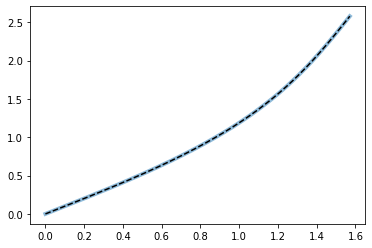

In [7]:
%time kinc = ellipkinc(phi, m)
plt.plot(phi, kinc, linewidth=4, alpha=0.5)
%time fburl = f(phi, m)
plt.plot(phi, fburl, 'k--')

In [8]:
%timeit kinc = ellipkinc(phi, m)
%timeit fburl = f(phi, m)

2.54 ms ± 39.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
824 µs ± 60.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


CPU times: user 4.89 ms, sys: 1.37 ms, total: 6.26 ms
Wall time: 5.27 ms
CPU times: user 1.63 ms, sys: 491 µs, total: 2.13 ms
Wall time: 2.16 ms


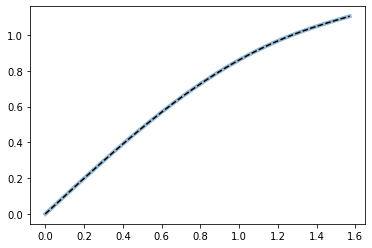

In [4]:
%time einc = ellipeinc(phi, m)
plt.plot(phi, einc, linewidth=4, alpha=0.5)
%time eburl = e(phi, m)
plt.plot(phi, eburl, 'k--')

In [6]:
%timeit einc = ellipeinc(phi, m)
%timeit eburl = e(phi, m)

2.86 ms ± 13.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.42 ms ± 69.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
